In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6788\414662191.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


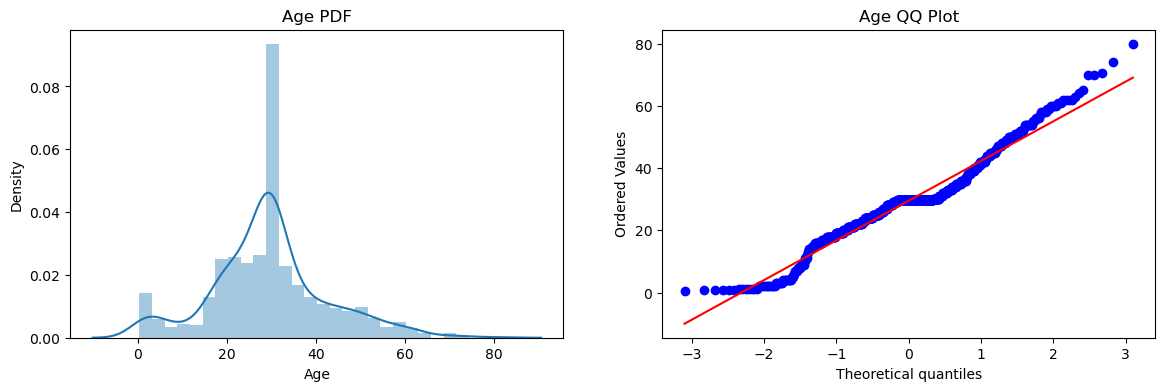

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ Plot")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6788\1967337841.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


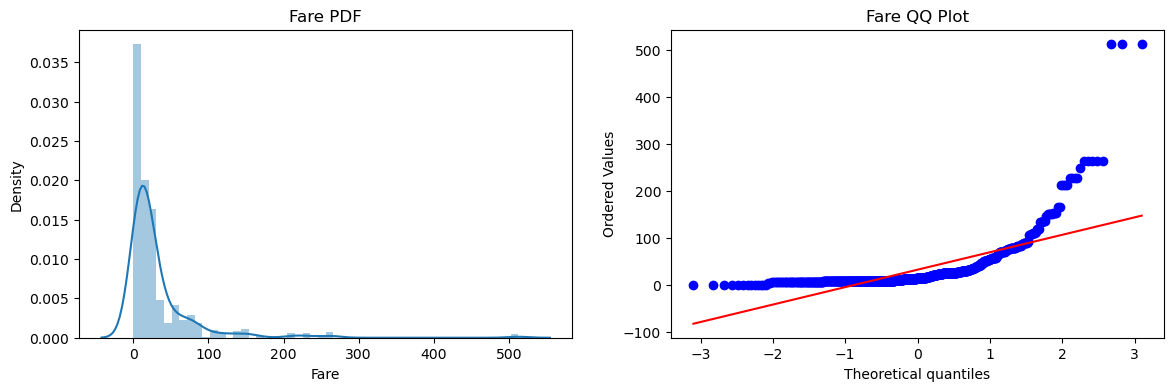

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")
plt.show()

fare is not normally distributed and right skewed

# Training without transformer

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6480446927374302


# Applying Function Transformer

In [14]:
trf = FunctionTransformer(func = np.log1p)

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


# cross validation

In [19]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6565917602996255


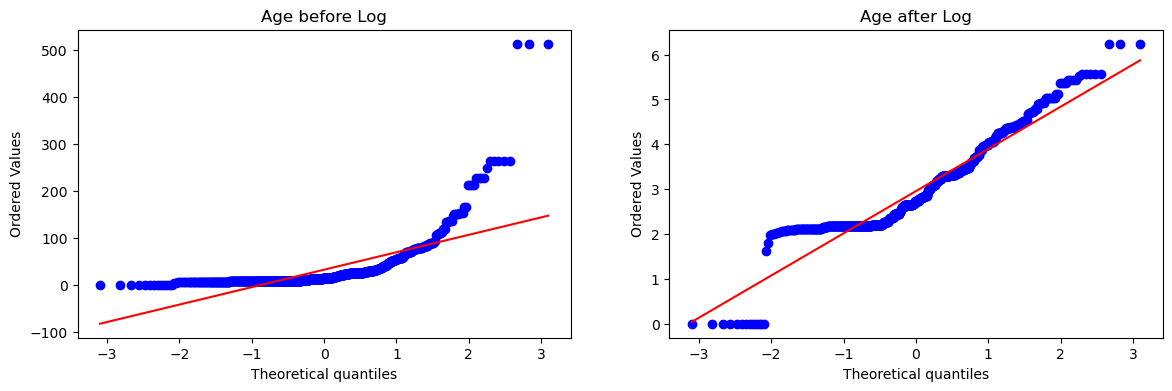

In [37]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot = plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot = plt)
plt.title("Fare after Log")

plt.show()

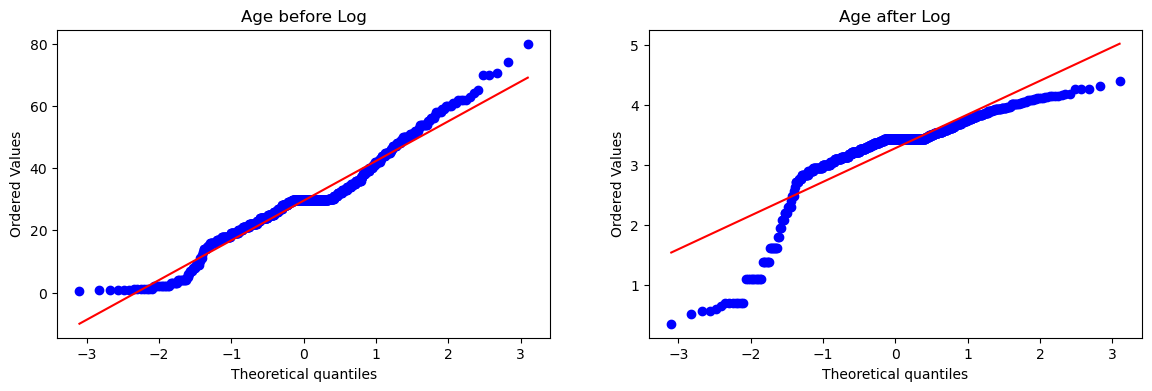

In [39]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot = plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot = plt)
plt.title("Age after Log")

plt.show()

In [41]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [47]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6621972534332085


## Conclusion
Fare was right skewed\
Age was almost mormally distributed

Since fare was right skew applying log transform and then using LR made it more accurate.\
The Accuracy of DT was not alterred

In [59]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder = 'passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()

    print('Accuracy', np.mean(cross_val_score(clf, X_trans, y, scoring = 'accuracy', cv=10)))

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist = 'norm', plot = plt)
    plt.title("Fare before Transform")

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist = 'norm', plot = plt)
    plt.title("Fare After Transform")

    plt.show()

Accuracy 0.6589013732833957


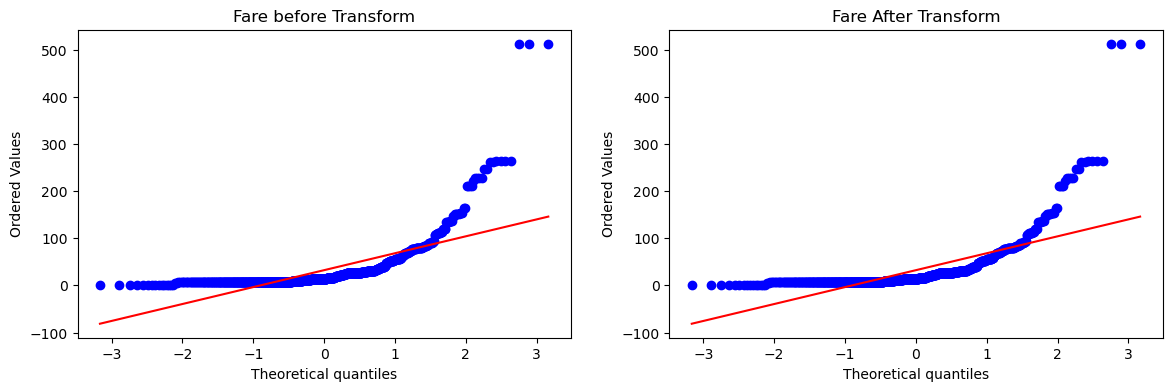

In [67]:
apply_transform(lambda x: x)

Accuracy 0.6442446941323345


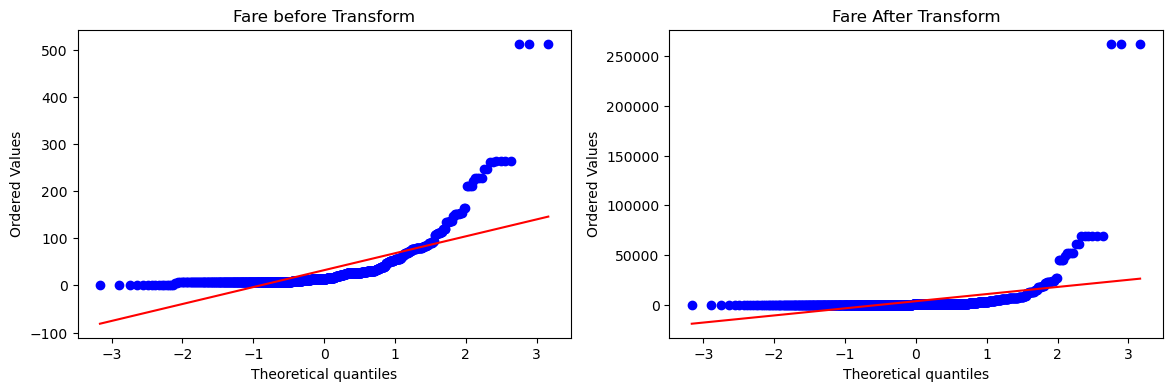

In [69]:
apply_transform(lambda x: x**2)

Accuracy 0.39843945068664166


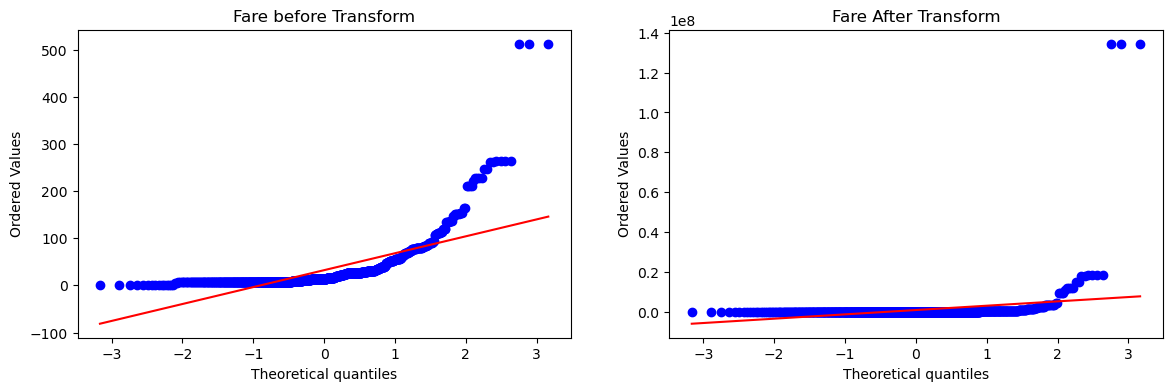

In [71]:
apply_transform(lambda x: x**3)

Accuracy 0.6611485642946316


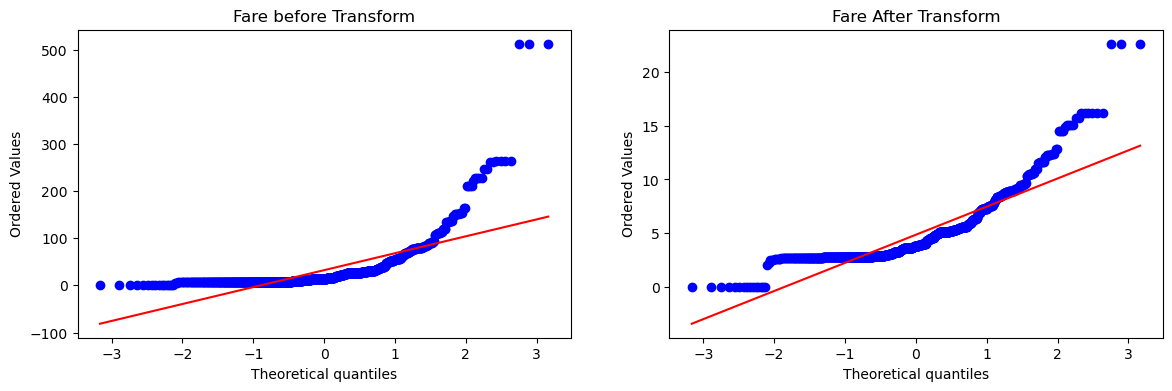

In [73]:
apply_transform(lambda x: x**0.5)

Accuracy 0.61729088639201


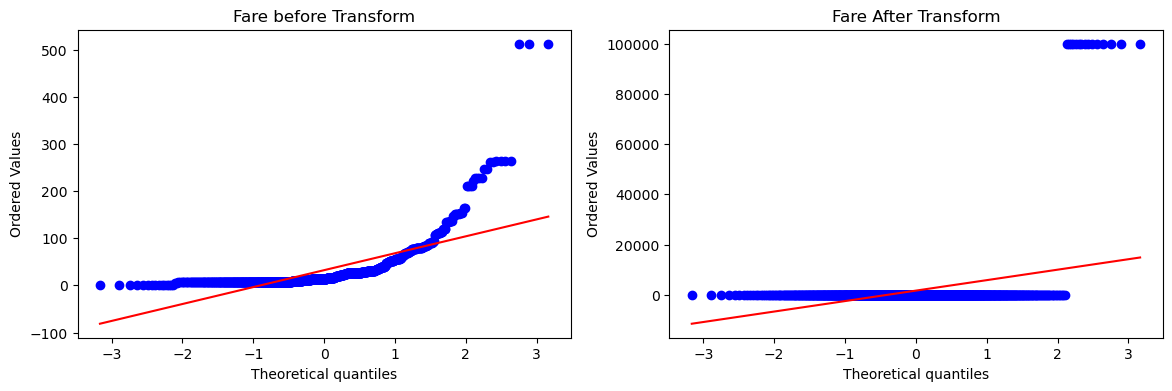

In [79]:
apply_transform(lambda x: 1/(x+0.00001))

Accuracy 0.6712609238451936


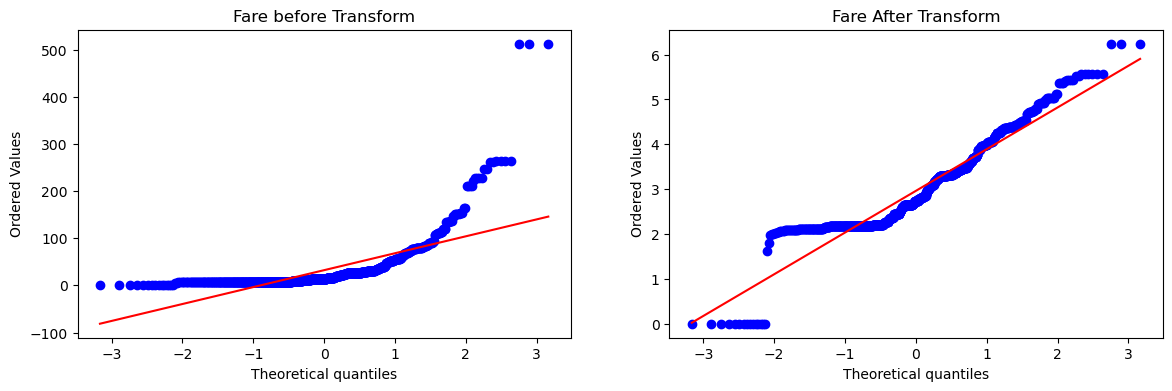

In [81]:
apply_transform(lambda x: np.log1p(x))

Accuracy 0.6195131086142323


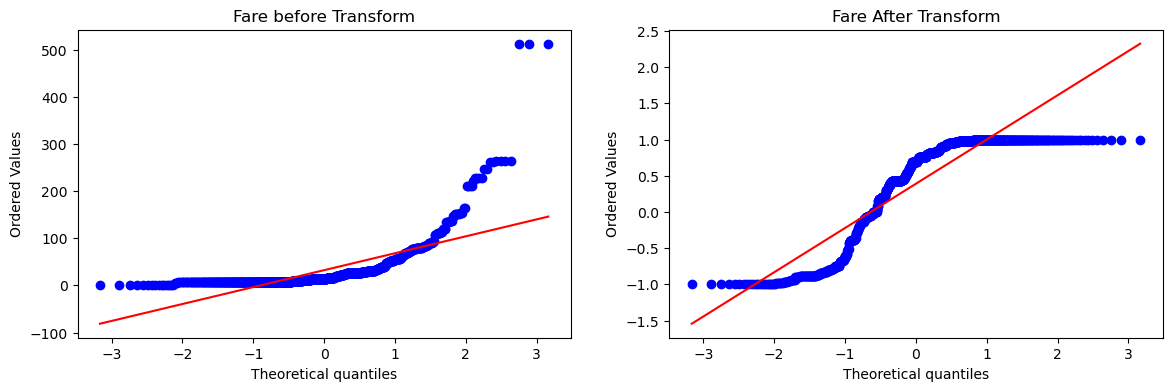

In [85]:
apply_transform(np.sin)

NameError: name 'x' is not defined